In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Housing.csv")
df.sample(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16088,4310703070,20150413T000000,650000.0,6,3.00,2960,5000,1.0,0,0,...,8,1790,1170,1968,0,98103,47.6971,-122.341,1280,1251
10848,8562900310,20140613T000000,615000.0,3,1.75,2350,20820,1.0,0,0,...,8,1800,550,1978,0,98074,47.6095,-122.059,2040,10800
5007,7454000605,20140710T000000,279000.0,2,1.00,670,6300,1.0,0,0,...,6,670,0,1942,0,98126,47.5161,-122.374,760,6300
9654,1126059170,20150225T000000,760500.0,4,2.25,2310,36136,2.0,0,0,...,9,2310,0,1977,0,98072,47.7506,-122.122,3930,36136


In [10]:
x = df.iloc[: , 3 :]
y = df["price"]

In [12]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398669,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,0.676503,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.473841,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.398669,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=35)

In [20]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [36]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

# Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(x_train , y_train)
lr.score(x_test , y_test)*100

69.07906561476963

In [39]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

46904683021.77896
127064.52783203147
216574.8900998889


In [22]:
lr.coef_

array([-2.95768218e+04,  2.98499881e+04, -9.70582592e+17,  5.12409160e+03,
        5.20746835e+03,  5.23385526e+04,  3.84878587e+04,  1.66307029e+04,
        1.13335921e+05,  8.75103330e+17,  4.67700898e+17, -7.58536460e+04,
        7.82068495e+03, -3.16664452e+04,  8.40013372e+04, -2.91802845e+04,
        1.61264826e+04, -9.96650494e+03])

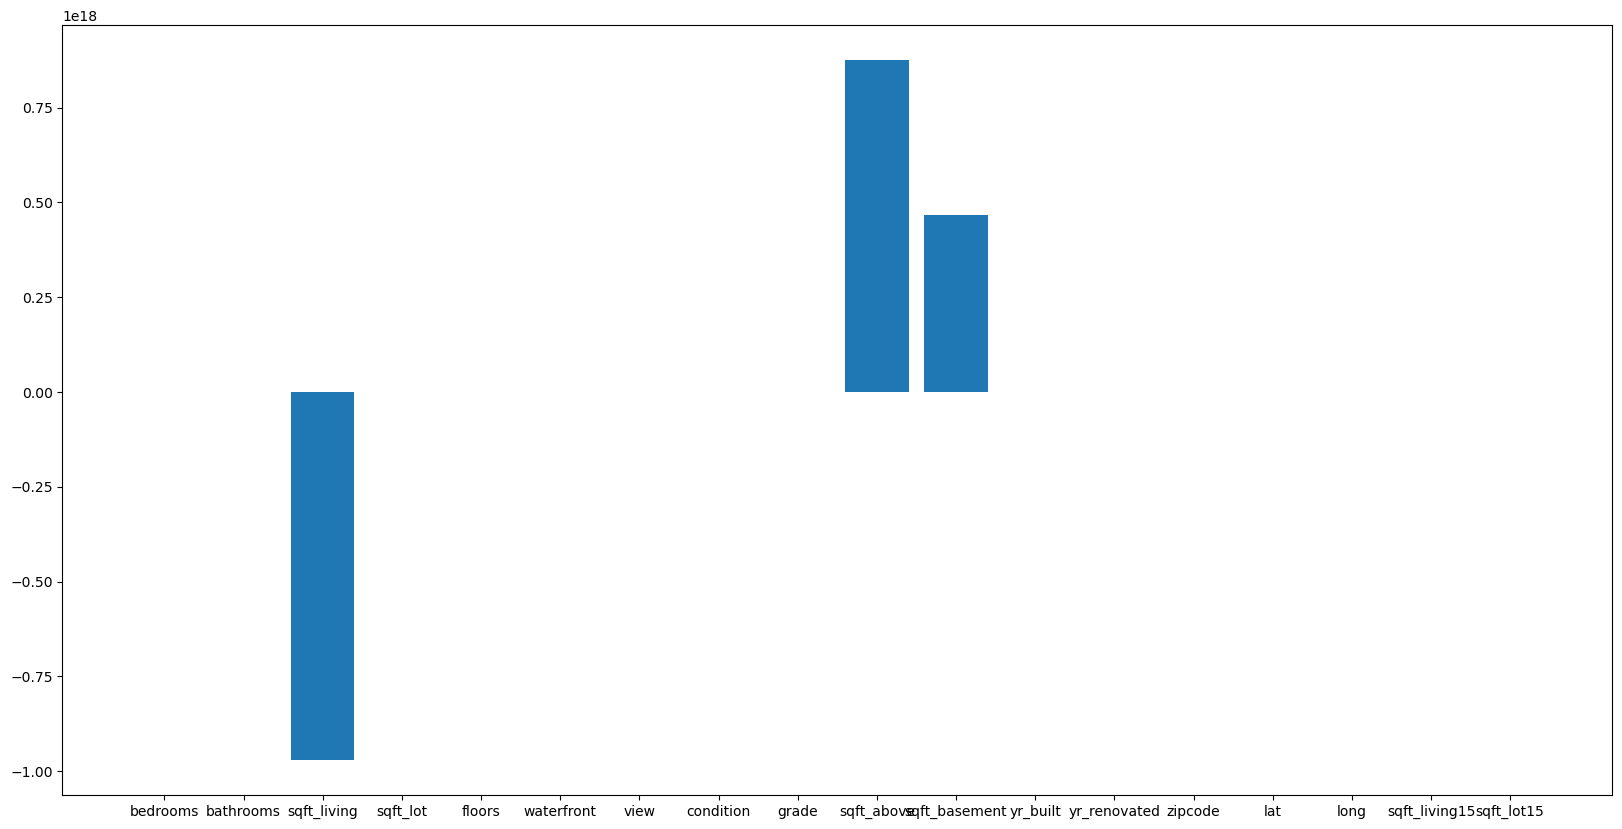

In [30]:
plt.figure(figsize=(20,10))
plt.bar(x.columns , lr.coef_)
plt.show()

# Lasso

In [32]:
la  = Lasso(alpha=10)
la.fit(x_train , y_train)
la.score(x_test,  y_test)*100

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.092e+13, tolerance: 2.257e+11
  model = cd_fast.enet_coordinate_descent(


69.06076850894219

In [40]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

46932438326.27137
126975.2961400441
216638.95846839593


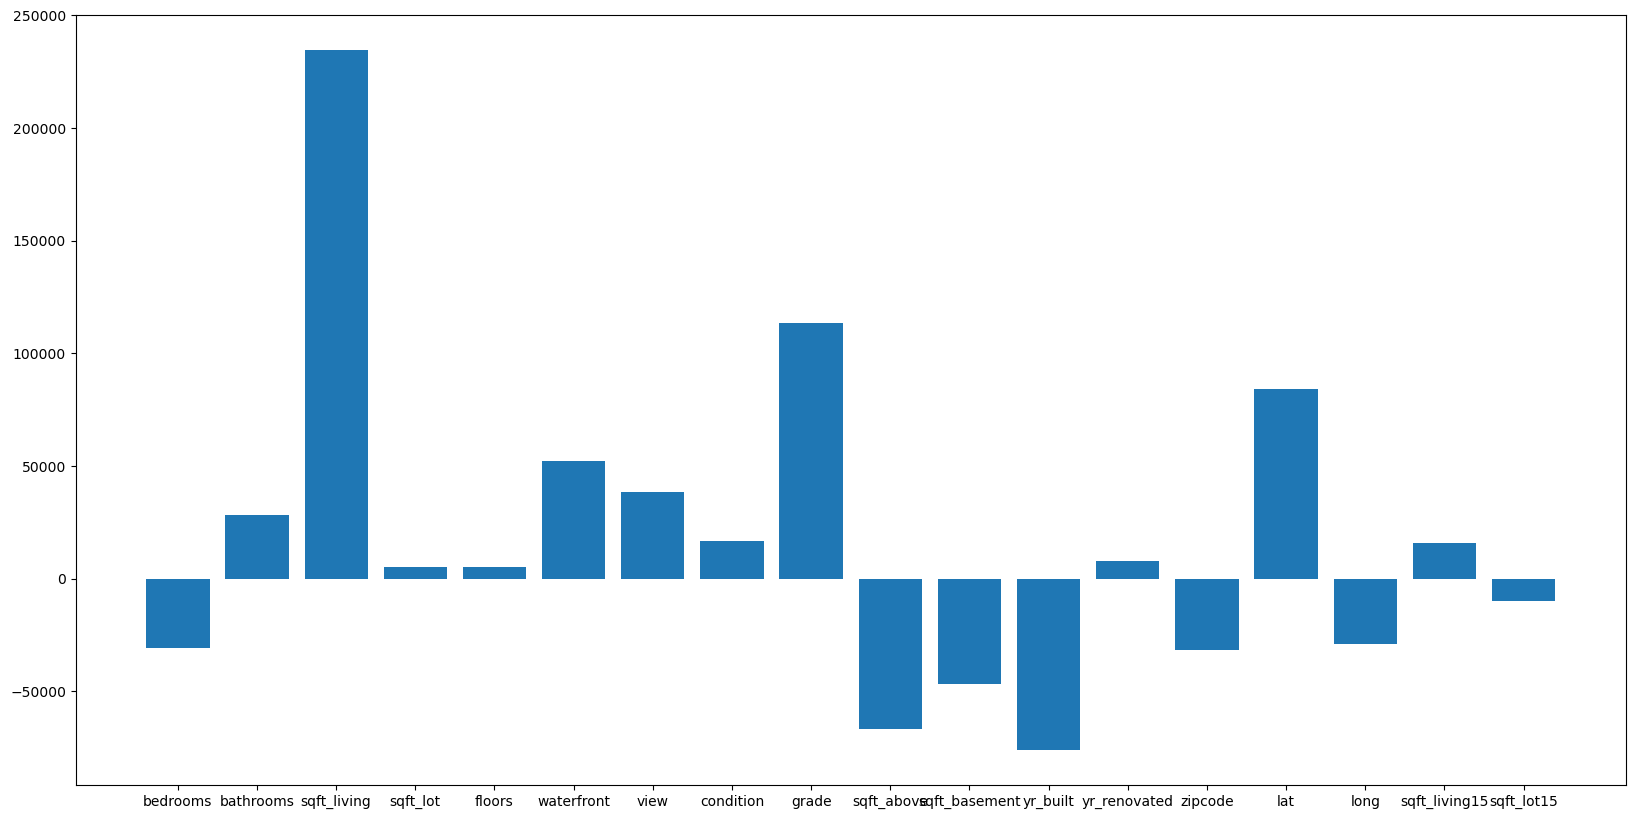

In [33]:
plt.figure(figsize=(20,10))
plt.bar(x.columns , la.coef_)
plt.show()

# Ridge

In [34]:
ri  = Ridge(alpha=10)
ri.fit(x_train , y_train)
ri.score(x_test,  y_test)*100

69.0588784334592

In [41]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

46935305425.638824
126954.14557445592
216645.57559673087


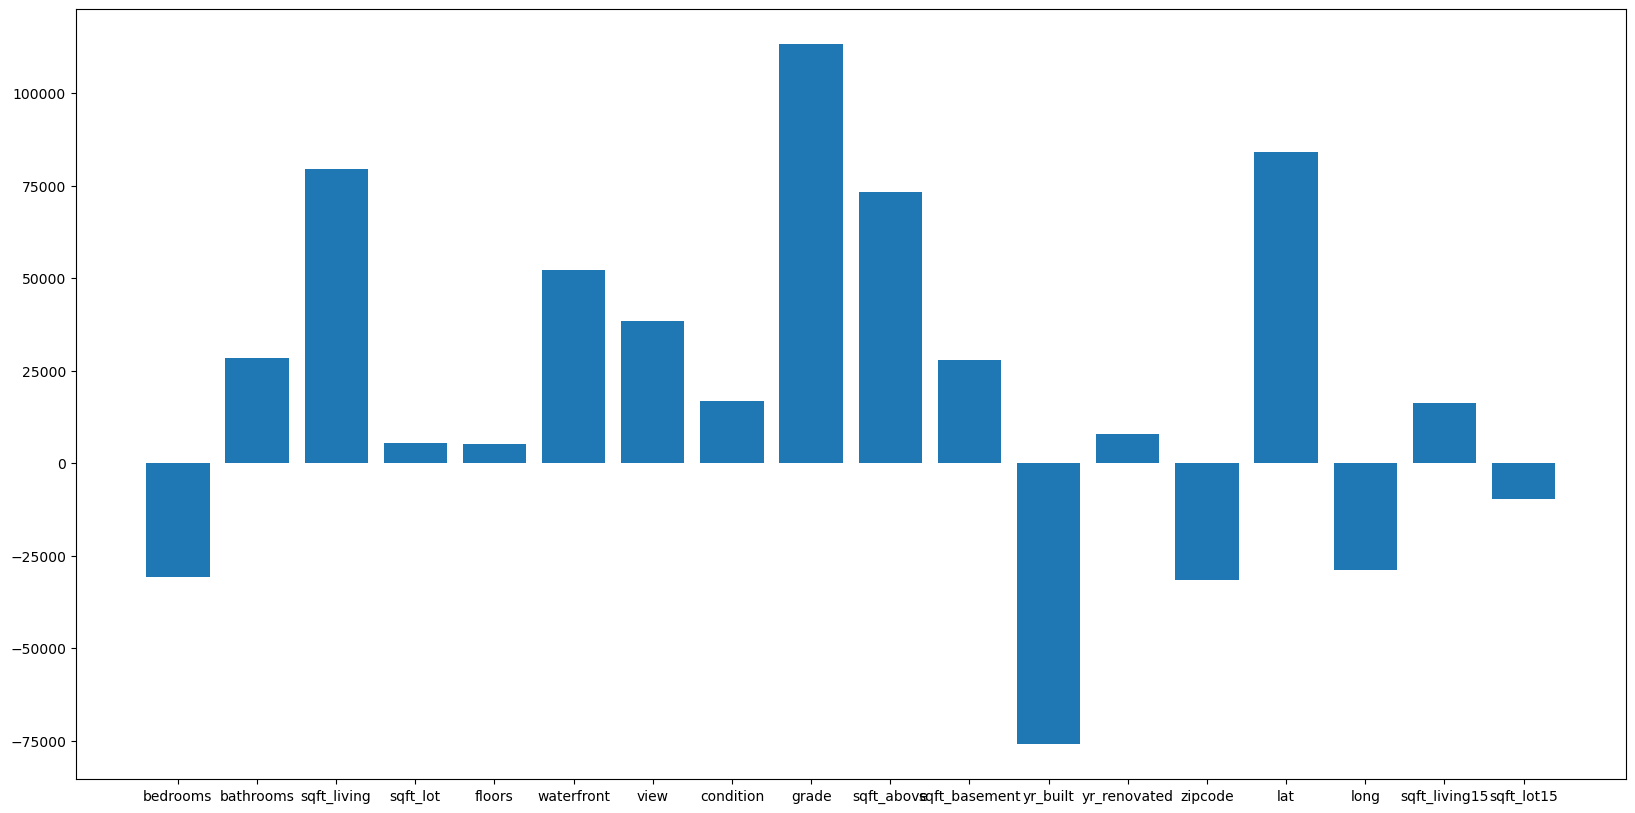

In [35]:
plt.figure(figsize=(20,10))
plt.bar(x.columns , ri.coef_)
plt.show()